## Exploratory Data Analysis

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

### Import dataset

In [2]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


In [3]:
# df['renov_yn'] = np.where(df.yr_renovated != 0, 1, 0)

In [4]:
corr_matrix = df.corr(method='spearman').abs()
corr_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.0000,0.0062,0.0151,0.0017,0.1166,0.0189,0.0036,0.0125,0.0239,0.0199,0.0035,0.0014,0.0267,0.0175,0.0053,0.0036,0.0073,0.0002,0.1146,0.0043
bedrooms,0.0062,1.0000,0.5208,0.6477,0.2170,0.2284,0.0077,0.0817,0.0117,0.3804,0.5401,0.2298,0.1806,0.0166,0.1678,0.0218,0.1925,0.4442,0.2022,0.3442
bathrooms,0.0151,0.5208,1.0000,0.7459,0.0692,0.5476,0.0495,0.1560,0.1637,0.6585,0.6914,0.1914,0.5677,0.0425,0.2053,0.0081,0.2623,0.5707,0.0637,0.4973
sqft_living,0.0017,0.6477,0.7459,1.0000,0.3047,0.4012,0.0703,0.2330,0.0631,0.7163,0.8433,0.3278,0.3525,0.0526,0.2072,0.0306,0.2853,0.7470,0.2846,0.6440
sqft_lot,0.1166,0.2170,0.0692,0.3047,1.0000,0.2340,0.0857,0.1176,0.1150,0.1525,0.2731,0.0368,0.0373,0.0086,0.3194,0.1219,0.3705,0.3598,0.9223,0.0751
floors,0.0189,0.2284,0.5476,0.4012,0.2340,1.0000,0.0239,0.0192,0.2881,0.5018,0.5992,0.2725,0.5514,0.0126,0.0618,0.0243,0.1489,0.3056,0.2309,0.3225
waterfront,0.0036,0.0077,0.0495,0.0703,0.0857,0.0239,1.0000,0.2851,0.0167,0.0622,0.0545,0.0519,0.0286,0.0916,0.0296,0.0191,0.0381,0.0746,0.0923,0.1151
view,0.0125,0.0817,0.1560,0.2330,0.1176,0.0192,0.2851,1.0000,0.0461,0.2171,0.1442,0.2367,0.0669,0.0966,0.0780,0.0004,0.1024,0.2560,0.1171,0.2939
condition,0.0239,0.0117,0.1637,0.0631,0.1150,0.2881,0.0167,0.0461,1.0000,0.1681,0.1586,0.1614,0.3939,0.0663,0.0224,0.0225,0.0850,0.0871,0.1179,0.0180
grade,0.0199,0.3804,0.6585,0.7163,0.1525,0.5018,0.0622,0.2171,0.1681,1.0000,0.7117,0.0927,0.5009,0.0159,0.1819,0.1036,0.2234,0.6627,0.1566,0.6582


In [5]:
df.price.describe()

count     21597.0000
mean     540296.5735
std      367368.1401
min       78000.0000
25%      322000.0000
50%      450000.0000
75%      645000.0000
max     7700000.0000
Name: price, dtype: float64

<AxesSubplot:>

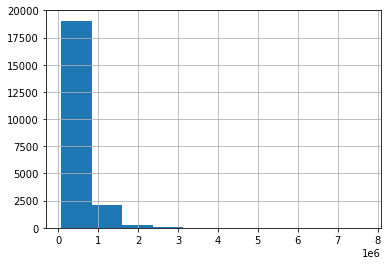

In [6]:
df.price.hist()

In [7]:
## df.price = np.log(df.price.values)

<AxesSubplot:>

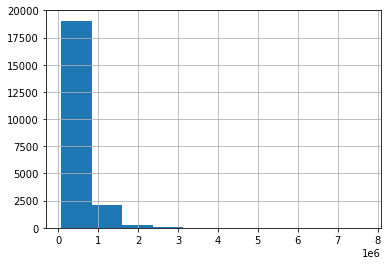

In [8]:
df.price.hist()

<AxesSubplot:ylabel='Count'>

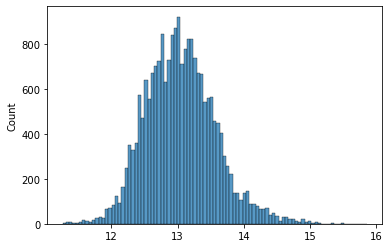

In [9]:
sns.histplot(np.log(df.price.values))

### Columns type

### Drop not relevant columns

In [10]:
df = df.drop(['id','lat', 'long', 'date', 'bedrooms', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)
df

,bathrooms,sqft_living,waterfront,view,grade,yr_built,zipcode,price
0,1.0000,1180,0,0,7,1955,98178,221900
1,2.2500,2570,0,0,7,1951,98125,538000
2,1.0000,770,0,0,6,1933,98028,180000
3,3.0000,1960,0,0,7,1965,98136,604000
4,2.0000,1680,0,0,8,1987,98074,510000
...,...,...,...,...,...,...,...,...
21592,2.5000,1530,0,0,8,2009,98103,360000
21593,2.5000,2310,0,0,8,2014,98146,400000
21594,0.7500,1020,0,0,7,2009,98144,402101
21595,2.5000,1600,0,0,8,2004,98027,400000


### Checking Columns

In [11]:
df = df.drop(15856).reset_index(drop=True)

In [12]:
df

,bathrooms,sqft_living,waterfront,view,grade,yr_built,zipcode,price
0,1.0000,1180,0,0,7,1955,98178,221900
1,2.2500,2570,0,0,7,1951,98125,538000
2,1.0000,770,0,0,6,1933,98028,180000
3,3.0000,1960,0,0,7,1965,98136,604000
4,2.0000,1680,0,0,8,1987,98074,510000
...,...,...,...,...,...,...,...,...
21591,2.5000,1530,0,0,8,2009,98103,360000
21592,2.5000,2310,0,0,8,2014,98146,400000
21593,0.7500,1020,0,0,7,2009,98144,402101
21594,2.5000,1600,0,0,8,2004,98027,400000


In [13]:
df['bathrooms'].value_counts()

2.5000    5377
1.0000    3851
1.7500    3047
2.2500    2047
2.0000    1930
1.5000    1445
2.7500    1185
3.0000     753
3.5000     731
3.2500     589
3.7500     155
4.0000     136
4.5000     100
4.2500      79
0.7500      71
4.7500      23
5.0000      21
5.2500      13
5.5000      10
1.2500       9
6.0000       6
0.5000       4
5.7500       4
6.7500       2
8.0000       2
6.2500       2
6.5000       2
7.5000       1
7.7500       1
Name: bathrooms, dtype: int64

In [14]:
df['bathrooms'] = round(df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] == 0, 1, df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] > 5, 5, df['bathrooms'])

## Data Cleaning

### Transform yr_built and yr_renovated

In [15]:
df['yr_built']= list(map(lambda x: 2015-x, df['yr_built']))

In [16]:
df['yr_built']

0        60
1        64
2        82
3        50
4        28
         ..
21591     6
21592     1
21593     6
21594    11
21595     7
Name: yr_built, Length: 21596, dtype: int64

In [17]:
df.rename(columns = {'yr_built' : 'age_build'}, inplace=True)

In [18]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price
0,1.0000,1180,0,0,7,60,98178,221900
1,2.0000,2570,0,0,7,64,98125,538000
2,1.0000,770,0,0,6,82,98028,180000
3,3.0000,1960,0,0,7,50,98136,604000
4,2.0000,1680,0,0,8,28,98074,510000
...,...,...,...,...,...,...,...,...
21591,2.0000,1530,0,0,8,6,98103,360000
21592,2.0000,2310,0,0,8,1,98146,400000
21593,1.0000,1020,0,0,7,6,98144,402101
21594,2.0000,1600,0,0,8,11,98027,400000


### Transform zipcode

In [19]:
price_zip_mean = df.groupby(['zipcode'])['price'].mean()
price_zip_mean.sort_values(ascending=False)

zipcode
98039   2161300.0000
98004   1356523.9905
98040   1194873.6383
98112   1096239.0074
98102    899607.6731
            ...     
98148    284908.5965
98001    281194.8698
98032    251296.2400
98168    240328.3717
98002    234284.0352
Name: price, Length: 70, dtype: float64

In [20]:
price_zip = df.groupby(['zipcode'])['price'].mean()
pz = price_zip.sort_values(ascending=False).reset_index()
pz

,zipcode,price
0,98039,2161300.0000
1,98004,1356523.9905
2,98040,1194873.6383
3,98112,1096239.0074
4,98102,899607.6731
...,...,...
65,98148,284908.5965
66,98001,281194.8698
67,98032,251296.2400
68,98168,240328.3717


In [21]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price
0,1.0000,1180,0,0,7,60,98178,221900
1,2.0000,2570,0,0,7,64,98125,538000
2,1.0000,770,0,0,6,82,98028,180000
3,3.0000,1960,0,0,7,50,98136,604000
4,2.0000,1680,0,0,8,28,98074,510000
...,...,...,...,...,...,...,...,...
21591,2.0000,1530,0,0,8,6,98103,360000
21592,2.0000,2310,0,0,8,1,98146,400000
21593,1.0000,1020,0,0,7,6,98144,402101
21594,2.0000,1600,0,0,8,11,98027,400000


In [22]:
Q1 = np.percentile(pz['price'], 10)
Q2 = np.percentile(pz['price'], 20)
Q3 = np.percentile(pz['price'], 30)
Q4 = np.percentile(pz['price'], 40)
Q5 = np.percentile(pz['price'], 50)
Q6 = np.percentile(pz['price'], 60)
Q7 = np.percentile(pz['price'], 70)
Q8 = np.percentile(pz['price'], 80)
Q9 = np.percentile(pz['price'], 90)

In [23]:
pz['quantile_zip'] = "1"
pz['quantile_zip'] = np.where(pz['price'] >= Q1, "2", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q2, "3", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q3, "4", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q4, "5", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q5, "6", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q6, "7", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q7, "8", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q8, "9", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q9, "10", pz['quantile_zip'])

In [24]:
pz

,zipcode,price,quantile_zip
0,98039,2161300.0000,10
1,98004,1356523.9905,10
2,98040,1194873.6383,10
3,98112,1096239.0074,10
4,98102,899607.6731,10
...,...,...,...
65,98148,284908.5965,1
66,98001,281194.8698,1
67,98032,251296.2400,1
68,98168,240328.3717,1


In [25]:
pz.groupby('quantile_zip').count()

,zipcode,price
quantile_zip,,
1,7,7
10,7,7
2,7,7
3,7,7
4,7,7
5,7,7
6,7,7
7,7,7
8,7,7


In [26]:
df = pd.merge(df, pz[['zipcode', 'quantile_zip']], on='zipcode', how='inner').sample(frac=1).reset_index(drop=True)

In [27]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price,quantile_zip
0,2.0000,1270,0,0,7,51,98031,246500,2
1,2.0000,1110,0,0,7,7,98144,365000,7
2,1.0000,1020,0,0,7,74,98115,485000,8
3,2.0000,1690,0,0,7,11,98053,498000,8
4,3.0000,2110,0,2,7,85,98136,610000,6
...,...,...,...,...,...,...,...,...,...
21591,2.0000,2590,0,0,9,24,98011,570000,5
21592,3.0000,3450,0,0,9,110,98122,1380000,8
21593,2.0000,1000,0,0,6,68,98155,305000,4
21594,1.0000,930,0,0,7,63,98115,392500,8


In [28]:
df = df.drop(columns=['zipcode'], axis=1)

In [29]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,price,quantile_zip
0,2.0000,1270,0,0,7,51,246500,2
1,2.0000,1110,0,0,7,7,365000,7
2,1.0000,1020,0,0,7,74,485000,8
3,2.0000,1690,0,0,7,11,498000,8
4,3.0000,2110,0,2,7,85,610000,6
...,...,...,...,...,...,...,...,...
21591,2.0000,2590,0,0,9,24,570000,5
21592,3.0000,3450,0,0,9,110,1380000,8
21593,2.0000,1000,0,0,6,68,305000,4
21594,1.0000,930,0,0,7,63,392500,8


In [30]:
df.to_excel("final_df_for_lin_reg_trial5.xlsx")

In [31]:
corr_matrix_t5 = df.corr(method='spearman').abs()
corr_matrix_t5

,bathrooms,sqft_living,waterfront,view,grade,age_build,price
bathrooms,1.0000,0.6738,0.0533,0.1783,0.5715,0.4272,0.4745
sqft_living,0.6738,1.0000,0.0703,0.2330,0.7163,0.3525,0.6440
waterfront,0.0533,0.0703,1.0000,0.2851,0.0622,0.0286,0.1151
view,0.1783,0.2330,0.2851,1.0000,0.2171,0.0669,0.2939
grade,0.5715,0.7163,0.0622,0.2171,1.0000,0.5009,0.6582
age_build,0.4272,0.3525,0.0286,0.0669,0.5009,1.0000,0.1021
price,0.4745,0.6440,0.1151,0.2939,0.6582,0.1021,1.0000


In [32]:
# quantile_zip plot

<AxesSubplot:xlabel='quantile_zip', ylabel='price'>

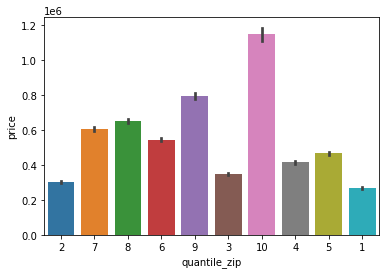

In [53]:
sns.barplot(x = df['quantile_zip'],y = df['price'])

In [54]:
df.to_excel("final_df_for_lin_reg_non_norml_price.xlsx")

## Linear Regression (trial 5)

#### XY Split

In [34]:
X5=df.drop('price', axis=1)
X5
y5=df.price
y5

0         246500
1         365000
2         485000
3         498000
4         610000
          ...   
21591     570000
21592    1380000
21593     305000
21594     392500
21595     329000
Name: price, Length: 21596, dtype: int64

In [35]:
X5

,bathrooms,sqft_living,waterfront,view,grade,age_build,quantile_zip
0,2.0000,1270,0,0,7,51,2
1,2.0000,1110,0,0,7,7,7
2,1.0000,1020,0,0,7,74,8
3,2.0000,1690,0,0,7,11,8
4,3.0000,2110,0,2,7,85,6
...,...,...,...,...,...,...,...
21591,2.0000,2590,0,0,9,24,5
21592,3.0000,3450,0,0,9,110,8
21593,2.0000,1000,0,0,6,68,4
21594,1.0000,930,0,0,7,63,8


In [36]:
df.columns

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'age_build',
       'price', 'quantile_zip'],
      dtype='object')

#### Data Splitting

In [37]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=.30,random_state=123)

#### Standardize

In [38]:
std_scaler5 = StandardScaler().fit(X_train5) 

X_train_scaled5 = std_scaler5.transform(X_train5)

In [39]:
X_test_scaled5 = std_scaler5.transform(X_test5)

In [40]:
print(X_train_scaled5)
print("--------")
print(X_test_scaled5)

[[-7.72621222e-02 -7.68734077e-01 -8.56149094e-02 ...  1.14702509e+00
  -1.19384810e+00  5.48944182e-01]
 [-7.72621222e-02  9.15450234e-05 -8.56149094e-02 ... -5.62655278e-01
  -1.09121332e+00 -1.28682018e+00]
 [-7.72621222e-02  4.40244377e-02 -8.56149094e-02 ...  2.92184906e-01
  -6.12251032e-01  5.48944182e-01]
 ...
 [-7.72621222e-02 -1.53673579e-01 -8.56149094e-02 ... -5.62655278e-01
  -5.43827848e-01  5.48944182e-01]
 [ 1.27299395e+00  9.66615184e-01 -8.56149094e-02 ...  2.92184906e-01
   1.06192402e-01  5.48944182e-01]
 [-7.72621222e-02 -2.74489034e-01 -8.56149094e-02 ... -5.62655278e-01
   2.08827178e-01 -1.65397305e+00]]
--------
[[ 2.62325002 -0.69185151 -0.08561491 ...  0.29218491 -1.22805969
   1.28324993]
 [-0.07726212  0.25270568 -0.08561491 ...  0.29218491 -0.50961626
  -0.9196673 ]
 [-0.07726212  3.53668941 11.68020859 ...  2.00186527  1.64571405
   1.6504028 ]
 ...
 [ 2.62325002  1.95510527 -0.08561491 ...  2.00186527 -1.46754083
   1.28324993]
 [-0.07726212  0.24172245 

In [41]:
X_train_const_scaled5 = sm.add_constant(X_train_scaled5) 

model5 = sm.OLS(y_train5, X_train_const_scaled5).fit()
predictions_train5 = model5.predict(X_train_const_scaled5) 

X_test_const_scaled5 = sm.add_constant(X_test_scaled5) 
predictions_test5 = model5.predict(X_test_const_scaled5) 
print_model5 = model5.summary()
print(print_model5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     6044.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:31:46   Log-Likelihood:            -2.0514e+05
No. Observations:               15117   AIC:                         4.103e+05
Df Residuals:                   15109   BIC:                         4.104e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.405e+05   1540.680    350.802      0.0

#### Model validation

In [42]:
#using sklearn
model5=LinearRegression()    # model
model5.fit(X_train_scaled5, y_train5)   # model train

LinearRegression()

In [43]:
model5.coef_ #gives you per column the slope (alpha)

array([ 15305.52912028, 147502.62170735,  56780.106764  ,  40330.03330014,
        92042.37267729,  62258.55611791, 125501.79691591])

In [44]:
model5.intercept_ #gives the optimal slope

540474.3150095919

In [45]:
R2_test5 = model5.score(X_test_scaled5,y_test5) # measure R2
R2_test5

0.7381370487127706

In [46]:
# Making prediction
y_pred5 = model5.predict(X_test_scaled5)
y_pred5

array([ 572917.21428039,  439168.28926112, 2310896.97232666, ...,
       1105803.56672377,  780152.11548141, 1672516.83656186])

In [47]:
y_test5

14863     395000
2277      362000
21578    2560000
18669     187500
21453     575000
          ...   
12811     278000
12288     110000
6556      900000
16310     683000
1050     2250000
Name: price, Length: 6479, dtype: int64

In [48]:
result=pd.DataFrame({"y_test":y_test5,"y_pred":y_pred5})

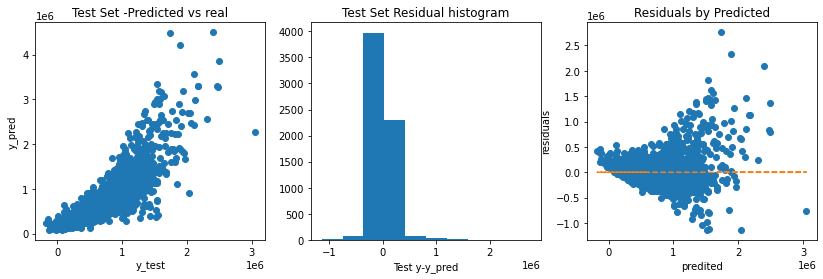

In [49]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred5, y_test5, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test5 - y_pred5)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred5,y_test5 - y_pred5,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred5,np.zeros(len(y_pred5)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

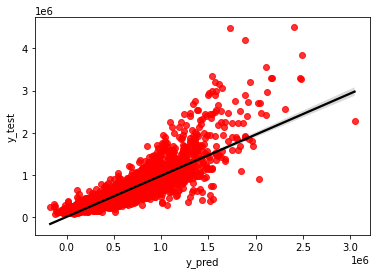

In [50]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Error metrics

In [51]:
print(mse(y_test5,y_pred5))
print(mae(y_test5,y_pred5))

34529673132.38255
115020.17891967953


#### Features Importance

In [52]:
features_importances5 = pd.DataFrame(data={
    'Attribute': X_train5.columns,
    'Importance': abs(model5.coef_)
})
features_importances5 = features_importances5.sort_values(by='Importance', ascending=False)
features_importances5

,Attribute,Importance
1,sqft_living,147502.6217
6,quantile_zip,125501.7969
4,grade,92042.3727
5,age_build,62258.5561
2,waterfront,56780.1068
3,view,40330.0333
0,bathrooms,15305.5291
